# **Aliasing**
Aliasing is a phenomenon that occurs when a continuous-time signal is sampled at a rate that is too low to capture the highest frequency components of the signal. This results in the high-frequency components being aliased or folded back into lower frequency components, which can cause distortion or even loss of information in the sampled signal.

Mathematically, aliasing can be understood in terms of the Nyquist-Shannon sampling theorem, which states that to avoid aliasing, a continuous-time signal must be sampled at a rate that is at least twice the highest frequency component of the signal. If the sampling rate is too low, the high-frequency components of the signal will be incorrectly represented as lower frequency components, resulting in aliasing.

For example, consider a continuous-time signal with a highest frequency component of 500 Hz. According to the Nyquist-Shannon sampling theorem, this signal must be sampled at a rate of at least 1000 Hz to avoid aliasing. If the signal is sampled at a lower rate, say 500 Hz, then any frequency components above 250 Hz will be aliased or folded back into the frequency range of 0-250 Hz, resulting in a distorted representation of the original signal.

To avoid aliasing, it is important to choose an appropriate sampling rate based on the highest frequency components of the signal being sampled. This can be done by using a low-pass filter to remove any high-frequency components that are above the Nyquist frequency (i.e., half the sampling rate) before sampling the signal. Additionally, oversampling the signal (i.e., sampling at a higher rate than the Nyquist rate) can also help to reduce the effects of aliasing and improve the accuracy of the sampled signal.

Here's an example Python code snippet to demonstrate the effects of aliasing:

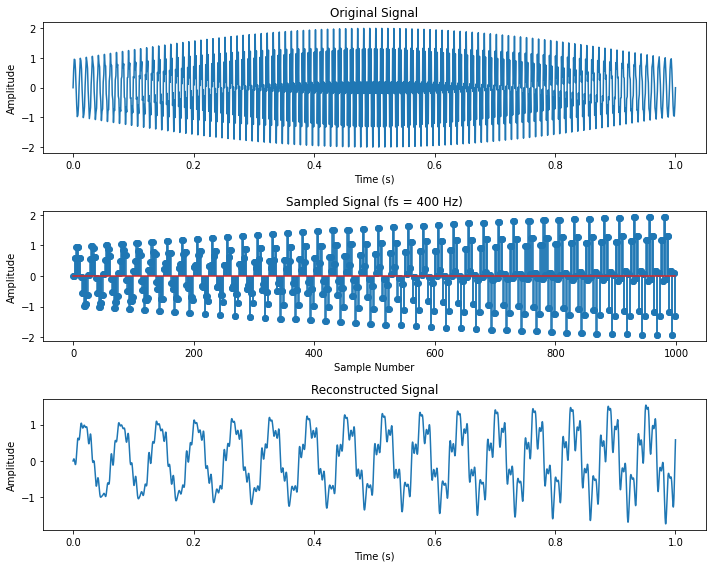

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a continuous-time signal with a highest frequency component of 500 Hz
t = np.linspace(0, 1, 1000)  # time axis
f1 = 100  # lowest frequency component
f2 = 500  # highest frequency component
x = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)

# Sample the signal at a low rate
fs = 400  # sampling frequency
n = np.arange(0, len(x))
xn = x[n*fs//1000]

# Reconstruct the analog signal using ideal bandlimited interpolation
Ts = 1/fs  # sampling period
t_interp = np.linspace(0, 1, 10000)  # time axis for interpolation
x_interp = np.zeros(len(t_interp))  # initialize the interpolated signal
for i in range(len(xn)):
    x_interp += xn[i]*np.sinc((t_interp - i*Ts)/Ts)

# Plot the original signal, the sampled signal, and the reconstructed signal
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
axs[0].plot(t, x)
axs[0].set_title('Original Signal')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')

axs[1].stem(n, xn)
axs[1].set_title('Sampled Signal (fs = 400 Hz)')
axs[1].set_xlabel('Sample Number')
axs[1].set_ylabel('Amplitude')

axs[2].plot(t_interp, x_interp)
axs[2].set_title('Reconstructed Signal')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Amplitude')
plt.tight_layout()
plt.show()



```
# Generate a continuous-time signal with a highest frequency component of 500 Hz
t = np.linspace(0, 1, 1000)  # time axis
f1 = 100  # lowest frequency component
f2 = 500  # highest frequency component
x = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)
```
This code generates a continuous-time signal x with a highest frequency component of 500 Hz, by summing two sine waves with frequencies of 100 Hz and 500 Hz respectively. The signal is defined over a time axis t that ranges from 0 to 1 with 1000 evenly spaced points using the np.linspace function.

Here's a brief explanation of the variables used in the code:

**t:** the time axis for the signal, ranging from 0 to 1 with 1000 evenly spaced points.

**f1:** the frequency of the lowest frequency component of the signal.

**f2:** the frequency of the highest frequency component of the signal.

**x:** the continuous-time signal, which is the sum of two sine waves with frequencies of f1 and f2 respectively. The amplitude of each sine wave is 1. The signal has a highest frequency component of 500 Hz because f2 is set to 500 Hz.


```
# Sample the signal at a low rate
fs = 400  # sampling frequency
n = np.arange(0, len(x))
xn = x[n*fs//1000]
```
This code samples the continuous-time signal x at a low rate of 400 Hz, which is not equal to the Nyquist rate for the highest frequency component of the signal (500 Hz). The signal is sampled using the **np.arange** function to create a range of sample numbers n from 0 to the length of x. The sampling rate is obtained by multiplying the sample number n by the ratio of the desired sampling frequency fs to the Nyquist frequency, which is **1000/2 = 500 Hz** for this signal.

The sampled signal xn is obtained by indexing x at the sample times  **n*fs//1000**, which rounds the sample times to the nearest integer using integer division (//). This is equivalent to downsampling the signal by a factor of 2, since the ratio of the sampling frequency to the Nyquist frequency is 2 for the original signal. This means that the highest frequency component of the sampled signal is 250 Hz, which is half the original signal's highest frequency component of 500 Hz.


```
# Reconstruct the analog signal using ideal bandlimited interpolation
Ts = 1/fs  # sampling period
t_interp = np.linspace(0, 1, 10000)  # time axis for interpolation
x_interp = np.zeros(len(t_interp))  # initialize the interpolated signal
for i in range(len(xn)):
    x_interp += xn[i]*np.sinc((t_interp - i*Ts)/Ts)
```
This code reconstructs the analog signal x from the sampled signal xn using ideal bandlimited interpolation. The interpolation is done using a sinc function that is shifted in time and scaled by the amplitude of each sample in xn.

Here's a brief explanation of the variables and steps involved in the code:

**Ts:** the sampling period, which is equal to 1/fs.

**t_interp:** a new time axis for the interpolated signal, ranging from 0 to 1 with 10000 evenly spaced points.

**x_interp:** a zero-filled array that will store the interpolated signal.

**for loop:** iterates over each sample in xn and adds a shifted and scaled sinc function to x_interp.

The sinc function is centered at the sample time and has a width of Ts, which is the duration of each sample. 

The sinc function is defined using the `np.sinc` function, which computes the normalized sinc function `sin(pi*x)/(pi*x)`. 

The scaling factor for each sinc function is the amplitude of the corresponding sample in xn.

The resulting interpolated signal x_interp is a continuous-time signal that approximates the original signal x. 

The quality of the interpolation depends on the width of the sinc function, which in turn depends on the sampling rate and the highest frequency component of the original signal. 

In this case, the sinc function is relatively wide due to the low sampling rate, which can result in significant interpolation errors and distortion of the signal.


```
# Plot the original signal, the sampled signal, and the reconstructed signal
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
axs[0].plot(t, x)
axs[0].set_title('Original Signal')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')

axs[1].stem(n, xn)
axs[1].set_title('Sampled Signal (fs = 400 Hz)')
axs[1].set_xlabel('Sample Number')
axs[1].set_ylabel('Amplitude')

axs[2].plot(t_interp, x_interp)
axs[2].set_title('Reconstructed Signal')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Amplitude')
plt.tight_layout()
plt.show()
```
This code plots the original signal, the sampled signal, and the reconstructed signal on three separate subplots. The axs variable is a tuple of AxesSubplot objects that corresponds to the three subplots.

The first subplot shows the original signal x plotted against the time axis t.

The second subplot shows the sampled signal xn plotted against the sample number n. The stem function is used to plot a vertical line at each sample point, with the height of the line indicating the amplitude of the sample.

The third subplot shows the reconstructed signal x_interp plotted against the new time axis t_interp. The reconstructed signal is generated using ideal bandlimited interpolation as explained in the previous code block.

# **How to Avoid Aliasing?**
Use sampling frequency greater than two times of maximum frequency. Here use 1000 Hz

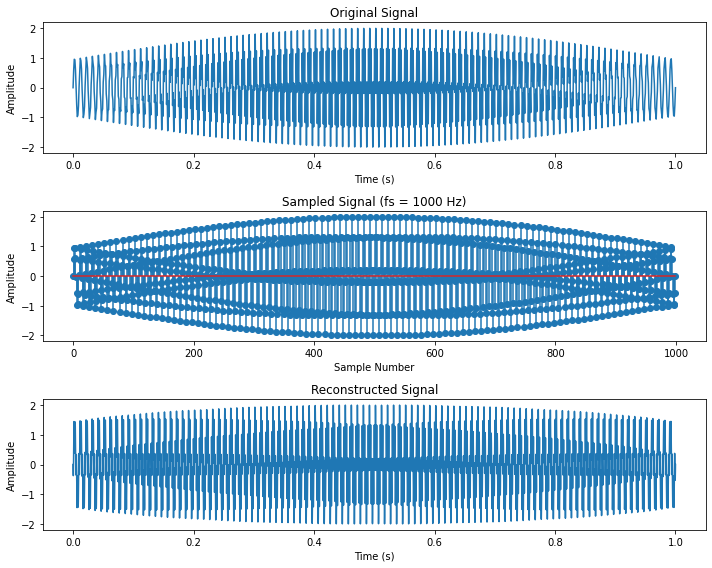

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a continuous-time signal with a highest frequency component of 500 Hz
t = np.linspace(0, 1, 1000)  # time axis
f1 = 100  # lowest frequency component
f2 = 500  # highest frequency component
x = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)

# Sample the signal at a low rate
fs = 1000  # sampling frequency
n = np.arange(0, len(x))
xn = x[n*fs//1000]

# Reconstruct the analog signal using ideal bandlimited interpolation
Ts = 1/fs  # sampling period
t_interp = np.linspace(0, 1, 10000)  # time axis for interpolation
x_interp = np.zeros(len(t_interp))  # initialize the interpolated signal
for i in range(len(xn)):
    x_interp += xn[i]*np.sinc((t_interp - i*Ts)/Ts)

# Plot the original signal, the sampled signal, and the reconstructed signal
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
axs[0].plot(t, x)
axs[0].set_title('Original Signal')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')

axs[1].stem(n, xn)
axs[1].set_title('Sampled Signal (fs = 1000 Hz)')
axs[1].set_xlabel('Sample Number')
axs[1].set_ylabel('Amplitude')

axs[2].plot(t_interp, x_interp)
axs[2].set_title('Reconstructed Signal')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Amplitude')
plt.tight_layout()
plt.show()

Sucessfully construct the original signal. The aliasing effect has been reduced. 